# Importing Required Libraries

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

# Connecting to the postgres db in EC2

In [2]:
load_dotenv()

# Get credentials from the .env file
POSTGRES_ADDRESS = os.getenv('POSTGRES_ADDRESS')
POSTGRES_PORT = os.getenv('POSTGRES_PORT')
POSTGRES_USERNAME = os.getenv('POSTGRES_USERNAME')
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')
POSTGRES_DBNAME = os.getenv('POSTGRES_DBNAME')

# create connection string
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, \
                                                                                        password=POSTGRES_PASSWORD,\
                                                                                        ipaddress=POSTGRES_ADDRESS,\
                                                                                        port=POSTGRES_PORT,\
                                                                                        dbname=POSTGRES_DBNAME))

# Create the connection
cnx = create_engine(postgres_str)

## EDA

### 1. What has been the most common source of news for crypto recently? (top 10)

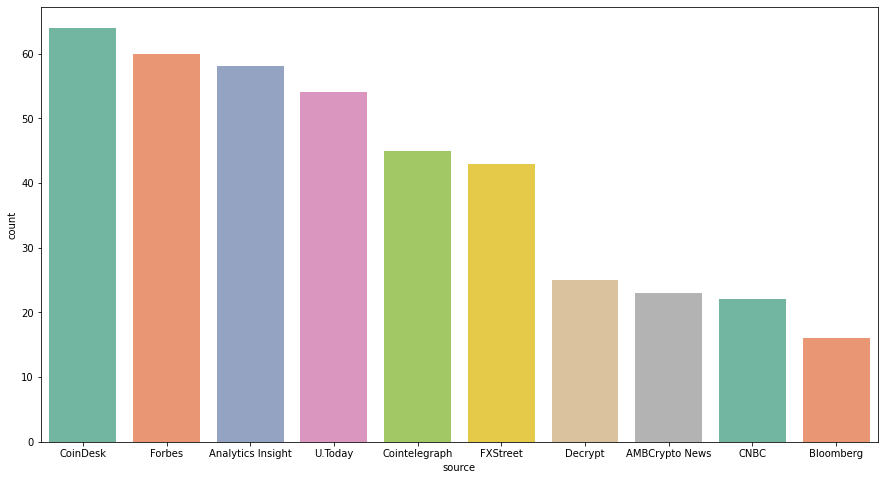

In [13]:
# Get the count for news headlines from each source
query = '''

select source, count(newsid) as count from crypto
group by source
order by count(newsid) DESC;

'''

df = pd.read_sql_query(query, cnx)

df = df.head(10)

ax = sns.barplot(x="source", y = 'count',  data=df, palette="Set2")

Insight:

Google news has most number of cryptocurrency related news from coindesk, forbes, Analytics Insight and U. Today. 

In [10]:
# Store these top 10 sources so that we can use them in the next query
top10 = tuple(df['source'])

### 2. How long are the headlines for the top 10 sources ?

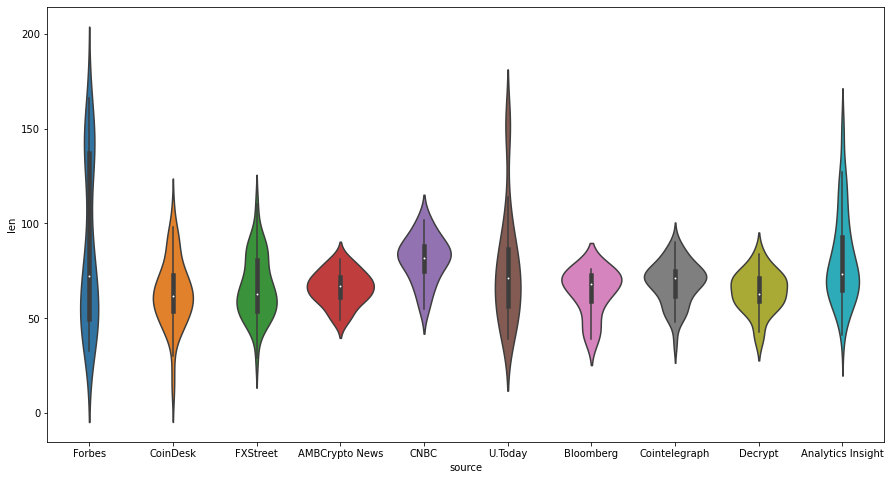

In [12]:
# Extract length of each headline from top 10 sources in terms of frequency
query = '''

select source, length(headline) as len
from crypto
where source in {}

'''.format(top10)

df = pd.read_sql_query(query, cnx)

ax = sns.violinplot(x="source", y="len", data=df)

Insight: 
Despite having a higher number of news articles, majority of headlines for Coindesk are significantly lower than the other 4 top sources namely Forbes, U.Today and Analytics Insight. 

Also, the median length for headlines in most of these sources is between 70-80 characters. 

### 3. Is there any time pattern that can be extracted from the article sources?

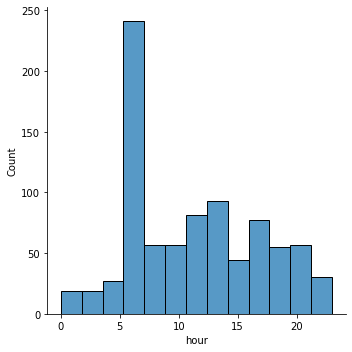

In [5]:
query = '''

select extract(hour from time) as hour
from crypto;

'''

df = pd.read_sql_query(query, cnx)

ax = sns.displot(df, x="hour")
plt.show()

Insight: We can clearly observe most of the headlines being published around the 5-7AM mark. Whether this time window aligns with other topics is a question for another day.